In [39]:
import pandas as pd
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##### We want to check factors that can be used as predictors for predicting the presidential election results based on the previous data. so, we are performing EDA to check relationship and collinearity among the factors and the election results

In [23]:
df = pd.read_csv('approval_rating.csv')

In [24]:
display(df)

,Date,State,replublican_Approval_rating,democratic_approval_rating,Result
0,2020,AL,0.569,0.396,R
1,2020,AK,0.529,0.445,R
2,2020,AZ,0.481,0.507,D
3,2020,AR,0.605,0.378,R
4,2020,CA,0.341,0.641,D
...,...,...,...,...,...
301,2000,VA,0.525,0.445,R
302,2000,WA,0.446,0.502,D
303,2000,WV,0.519,0.456,R
304,2000,WI,0.520,0.479,D


In [25]:
df.columns = ['year', 'state','republican_approval_ratings', 'democratic_approval_ratings','result']

In [26]:
display(df)

,year,state,republican_approval_ratings,democratic_approval_ratings,result
0,2020,AL,0.569,0.396,R
1,2020,AK,0.529,0.445,R
2,2020,AZ,0.481,0.507,D
3,2020,AR,0.605,0.378,R
4,2020,CA,0.341,0.641,D
...,...,...,...,...,...
301,2000,VA,0.525,0.445,R
302,2000,WA,0.446,0.502,D
303,2000,WV,0.519,0.456,R
304,2000,WI,0.520,0.479,D


In [27]:
## Convert to date format

df['year'] = pd.to_datetime(df['year'], format='%Y')

In [28]:
## convert  categorical variable into numeri values 
df['won'] = 1*(df['result']=='D')


In [29]:
display(df)

,year,state,republican_approval_ratings,democratic_approval_ratings,result,won
0,2020-01-01,AL,0.569,0.396,R,0
1,2020-01-01,AK,0.529,0.445,R,0
2,2020-01-01,AZ,0.481,0.507,D,1
3,2020-01-01,AR,0.605,0.378,R,0
4,2020-01-01,CA,0.341,0.641,D,1
...,...,...,...,...,...,...
301,2000-01-01,VA,0.525,0.445,R,0
302,2000-01-01,WA,0.446,0.502,D,1
303,2000-01-01,WV,0.519,0.456,R,0
304,2000-01-01,WI,0.520,0.479,D,1


In [30]:
## check correlation..

df_cor = df[['republican_approval_ratings','democratic_approval_ratings','won']]
df_cor.corr()

,republican_approval_ratings,democratic_approval_ratings,won
republican_approval_ratings,1.000000,-0.849138,-0.705196
democratic_approval_ratings,-0.849138,1.000000,0.725134
won,-0.705196,0.725134,1.000000


Text(0.5, 1.0, 'Election Result VS Republican Approval Ratings')

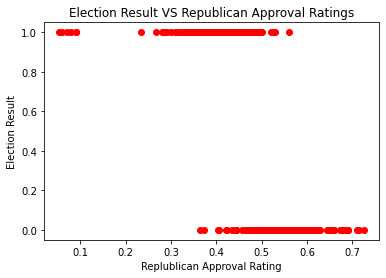

In [31]:
## Scatter Plots
plt.scatter(df['republican_approval_ratings'],df['won'], color='red')

# Add axis labels for clarity (x : TV budget, y : Sales)
plt.xlabel("Replublican Approval Rating")
plt.ylabel("Election Result")
plt.title('Election Result VS Republican Approval Ratings')

Text(0.5, 1.0, 'Election Result VS Democratic Approval Ratings')

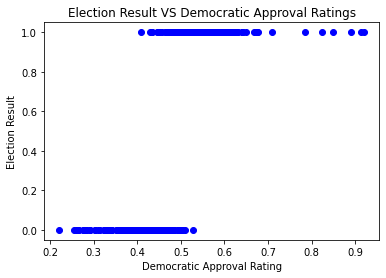

In [32]:
## Scatter Plots
plt.scatter(df['democratic_approval_ratings'],df['won'], color='blue')

# Add axis labels for clarity (x : TV budget, y : Sales)
plt.xlabel("Democratic Approval Rating")
plt.ylabel("Election Result")
plt.title('Election Result VS Democratic Approval Ratings')

<AxesSubplot:xlabel='state', ylabel='republican_approval_ratings'>

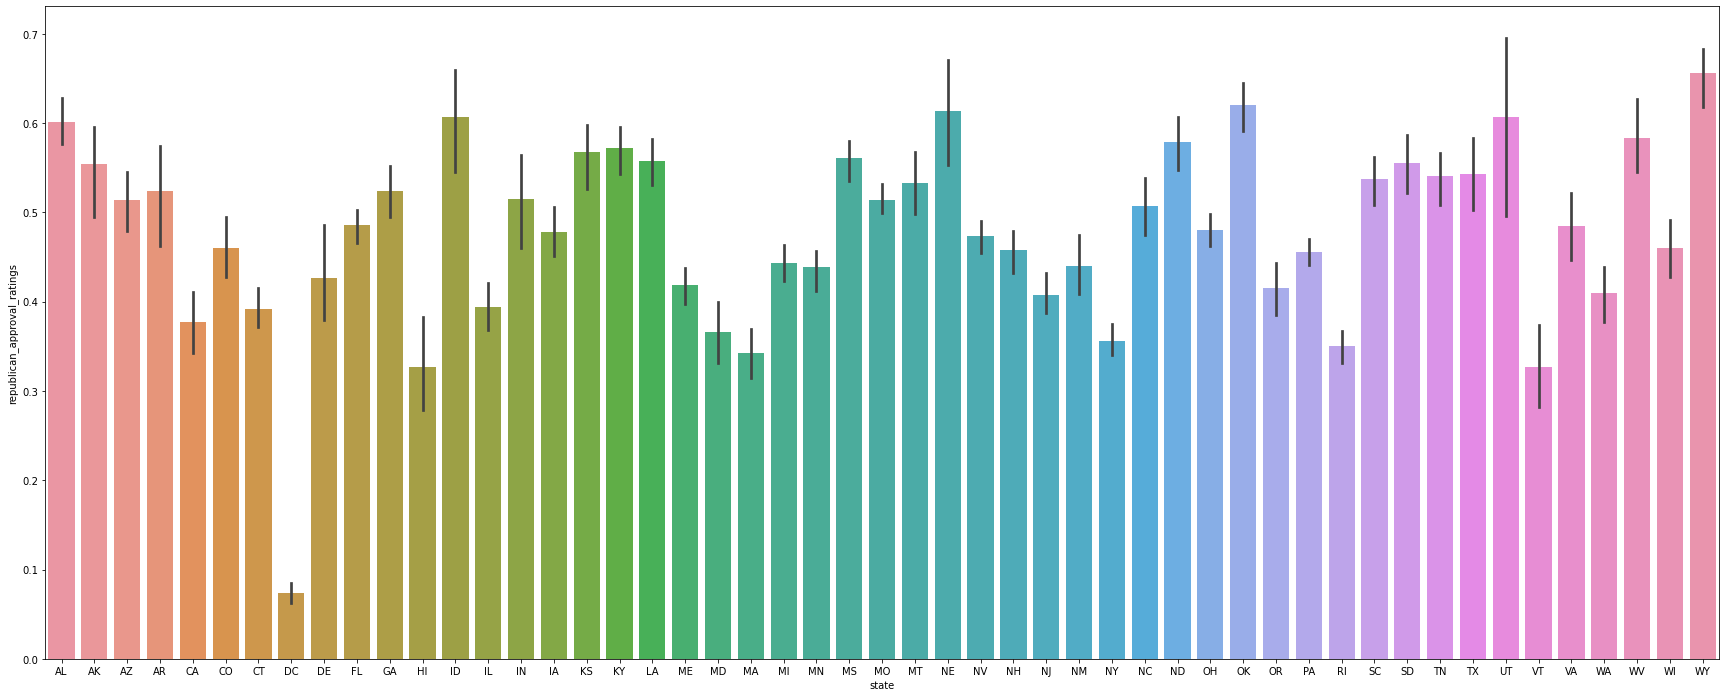

In [33]:
f, ax = plt.subplots(1,1, figsize=(30, 12))
ax.set_ylabel("Republican Approval Ratings")
sns.barplot(x="state", y="republican_approval_ratings", data=df, estimator=np.mean, ax=ax)

<AxesSubplot:xlabel='state', ylabel='democratic_approval_ratings'>

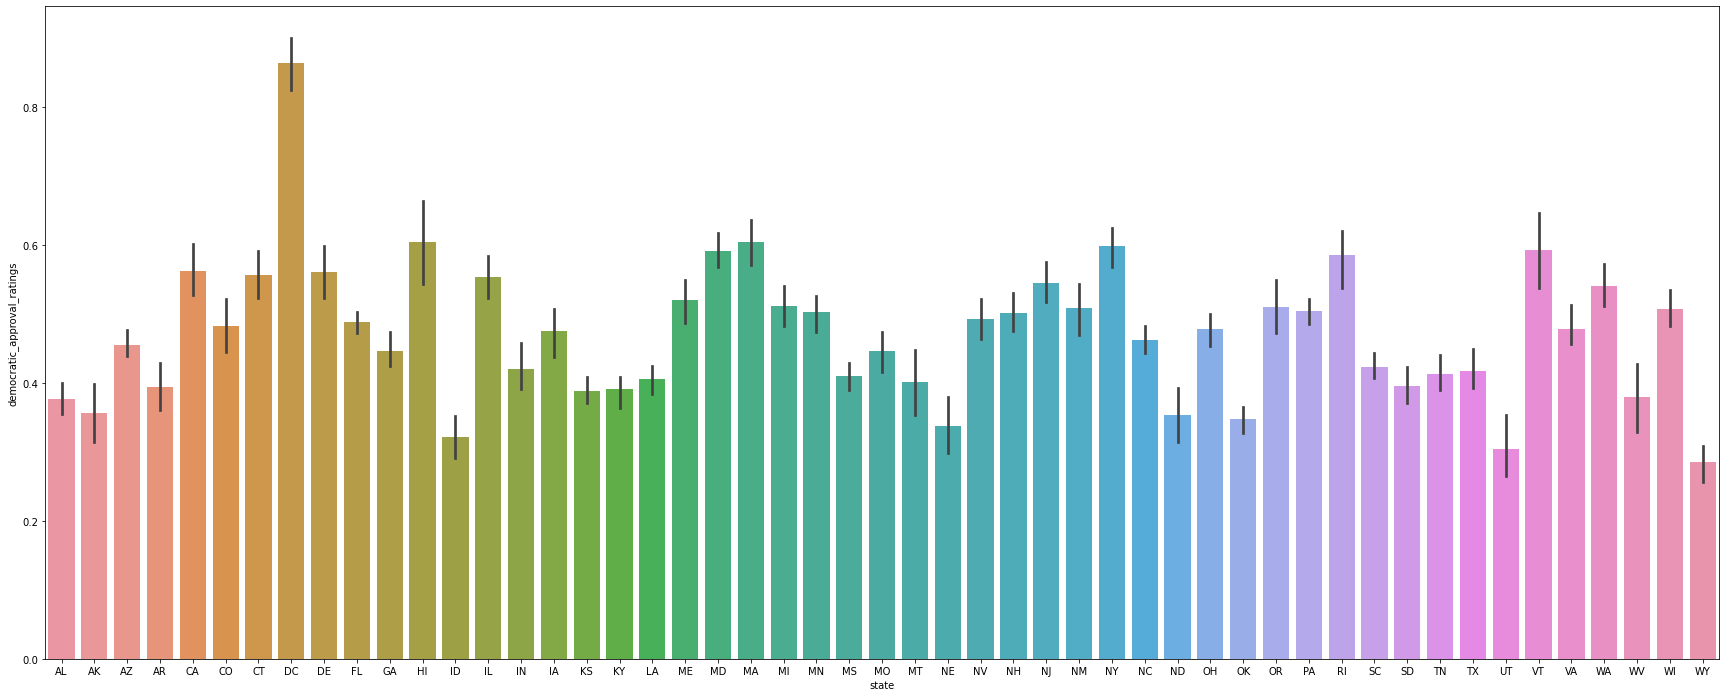

In [34]:
f, ax = plt.subplots(1,1, figsize=(30, 12))
sns.barplot(x="state", y="democratic_approval_ratings", data=df, estimator=np.mean, ax=ax)

,State,Approvals,appproval ratings
0,AL,Democratic Approvals,0.396
1,AK,Democratic Approvals,0.445
2,AZ,Democratic Approvals,0.507
3,AR,Democratic Approvals,0.378
4,CA,Democratic Approvals,0.641
...,...,...,...
607,VA,Republican Approvals,0.525
608,WA,Republican Approvals,0.446
609,WV,Republican Approvals,0.519
610,WI,Republican Approvals,0.520


<Figure size 1440x1152 with 0 Axes>

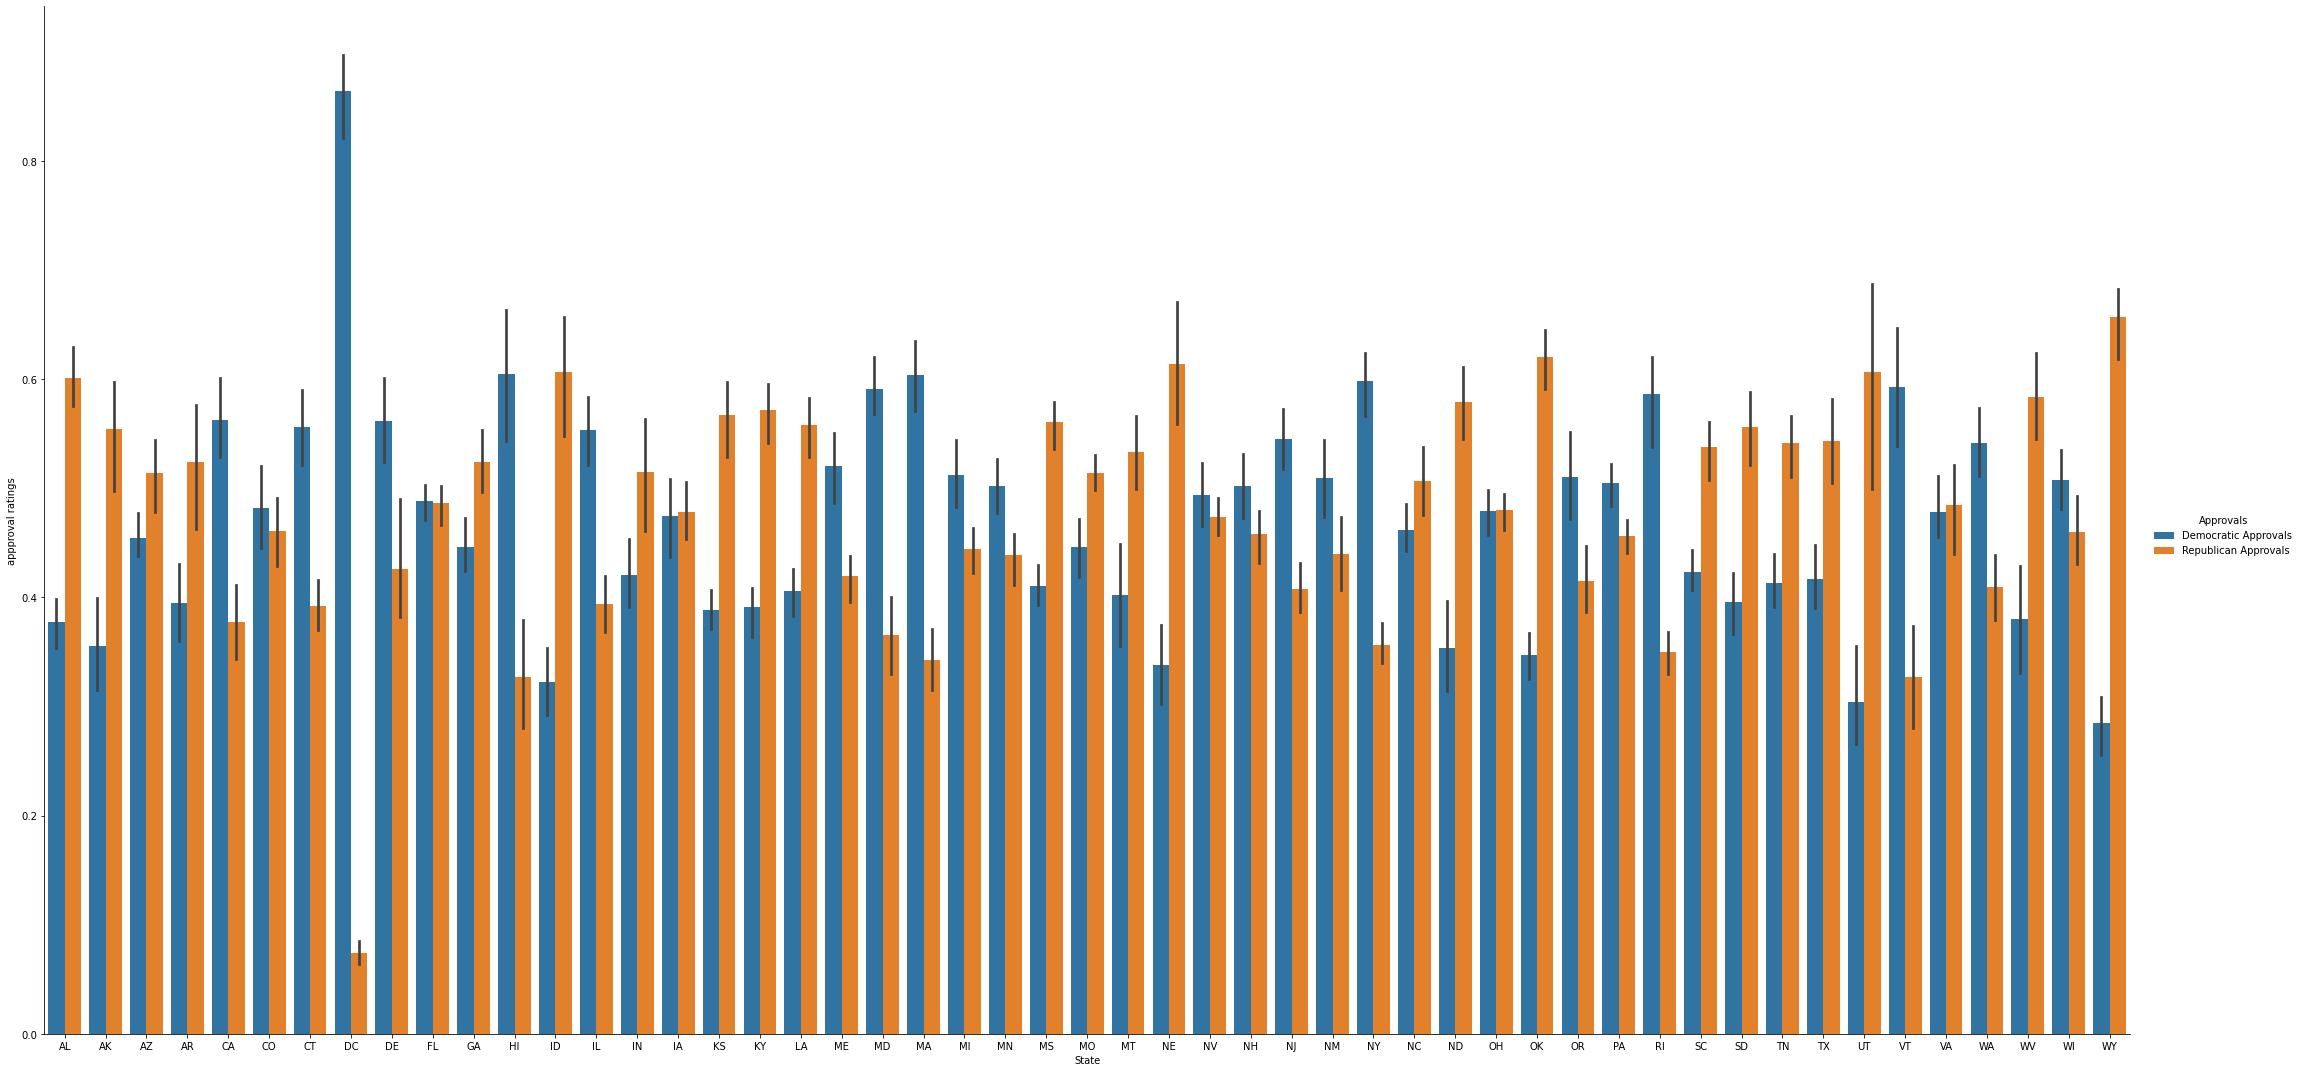

In [35]:
## Number of States won by republicans Year wise

df_dd = df[['state','democratic_approval_ratings','republican_approval_ratings']]
df_dd.columns = ['State','Democratic Approvals','Republican Approvals']

dfs1 = pd.melt(df_dd, id_vars = "State", var_name="Approvals", value_name='appproval ratings')

display(dfs1)  
plt.figure(figsize=(20, 16))
with sns.plotting_context(font_scale=10.5):
    b= sns.catplot(x = 'State', y='appproval ratings', 
               hue = 'Approvals',data=dfs1, kind='bar', height=15, aspect=2)

#sns.factorplot("state", "appproval ratings", col="approvals", data=dfs1, kind="bar")
plt.show()   

In [40]:
df_train, df_test, = train_test_split(
    df, test_size=0.2,  random_state = 121, shuffle=True, stratify = df['result']
)
display(df_train)

,year,state,republican_approval_ratings,democratic_approval_ratings,result,won
159,2008-01-01,CT,0.382,0.606,D,1
225,2004-01-01,MA,0.369,0.622,D,1
241,2004-01-01,OR,0.470,0.510,D,1
149,2012-01-01,WA,0.430,0.535,D,1
301,2000-01-01,VA,0.525,0.445,R,0
...,...,...,...,...,...,...
227,2004-01-01,MN,0.470,0.511,D,1
27,2020-01-01,NE,0.725,0.254,R,0
268,2000-01-01,IL,0.426,0.546,D,1
262,2000-01-01,DC,0.090,0.850,D,1


In [41]:
def get_model_coef(model):
    return np.hstack([model.intercept_.reshape(-1, 1), model.coef_]).T
  

def print_coef(X, model_coefficients ):

    coef_names = ["intercept"] + list(X.columns)
    list1 =[]
    list2 =[]

    for name, values in zip(coef_names, model_coefficients):
         list1.append(name)
         list2.append(values[0])
    df = pd.DataFrame({'Coeficent_Name': list1, 'Value': list2 })
    return df

In [42]:
x_train = df_train[['republican_approval_ratings','democratic_approval_ratings']]
y_train = df_train['won']
x_test = df_test[['republican_approval_ratings','democratic_approval_ratings']]
y_test = df_test['won']

logit2_3 = LogisticRegression(penalty='none', max_iter = 1000)
#Fit the model using the training set
logit2_3.fit(x_train,y_train)

# Get the coefficient estimates
slope_2_3_0 = logit2_3.coef_[0][0]
slope_2_3_1 = logit2_3.coef_[0][1]
intercept_2_3 = logit2_3.intercept_[0]
print("Logistic Regression Baseline Model Estimated Betas (Intercept,Slope): {0:.4f}, [{1:.4f}, {2:.4f}]".format(intercept_2_3,slope_2_3_0,slope_2_3_1))


#print("Logisitic Train & Validation Accuracy:", logit_train_accuracy, logit_val_accuracy)

# get the classification accuracy.
logit2_3_train_accuracy = logit2_3.score(x_train,y_train)
logit2_3_test_accuracy = logit2_3.score(x_test,y_test)

print("Logisitic Regression Baseline model  Train & Test Accuracy: {0:.4f}, {1:.4f}".format(logit2_3_train_accuracy, logit2_3_test_accuracy))

model_coef = get_model_coef(logit2_3)
df_23 = print_coef(x_train, model_coef )
display(df_23)

Logistic Regression Baseline Model Estimated Betas (Intercept,Slope): -6.7667, [-32.8996, 46.6676]
Logisitic Regression Baseline model  Train & Test Accuracy: 0.9426, 0.9194


,Coeficent_Name,Value
0,intercept,-6.766676
1,republican_approval_ratings,-32.899609
2,democratic_approval_ratings,46.667580


In [14]:
#Reading the presidential elections state data
data = pd.read_csv('1976-2016-president.csv')

In [15]:
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


In [16]:
#Finding the unique states to confirm if the data has all the U.S states 
states = data['state'].unique()
display(states.size)
assert (states.size==51), "The number of total states in the data is not equal to 51"

51

In [17]:
#Finding all the election years from the data
years = data['year'].unique()
display(years)

array([1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016],
      dtype=int64)

In [18]:
#Defining an aggreagte funtion to find the candidate won at each state and election year based on the candidatevotes 
agg_func = {'candidatevotes':'max','party':'first'}
grouped_df = data.groupby(['state','year','totalvotes'], as_index=False).agg(agg_func)
#Calculating the win ratio to see the percentage of votes with which the candidate won
grouped_df['winparty_votesratio'] = grouped_df['candidatevotes']/grouped_df['totalvotes']


In [19]:
#view the data
grouped_df

,state,year,totalvotes,candidatevotes,party,winparty_votesratio
0,Alabama,1976,1182850,659170,democrat,0.557273
1,Alabama,1980,1341929,654192,republican,0.487501
2,Alabama,1984,1441713,872849,republican,0.605425
3,Alabama,1988,1378476,815576,republican,0.591650
4,Alabama,1992,1688060,804283,republican,0.476454
...,...,...,...,...,...,...
557,Wyoming,2000,213726,147947,republican,0.692227
558,Wyoming,2004,243861,167629,republican,0.687396
559,Wyoming,2008,254904,164958,republican,0.647138
560,Wyoming,2012,250701,170962,republican,0.681936


* Inspecting the above data we can observe that almost at each state, every year either republican or democrat party are winning. So, we can see that these two parties play a major role in presdential elections. 

Text(0.5, 1.0, 'Election results vs states')

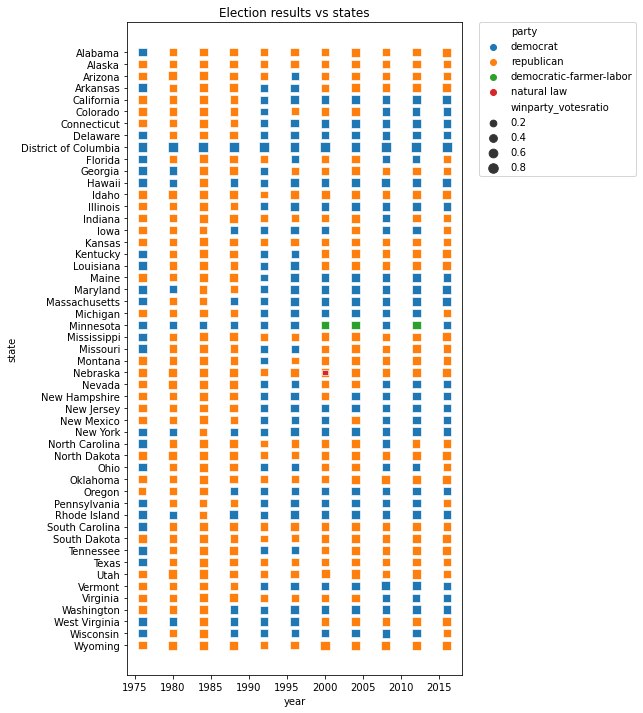

In [23]:
# Plot to visualize the state result at each election year to see the pattern or swing among the state results
f, ax = plt.subplots(1,1, figsize=(6, 12))
sns.scatterplot(x=grouped_df["year"],y=grouped_df['state'], hue=grouped_df['party'],size=grouped_df['winparty_votesratio'],sizes=(30,100), marker='s', ax=ax);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Election results vs states")

1. From the above plot we can see that republican party is strong in  few states like Wyoming, Utah, Kansas, Alaska, North Dakota.
2. Few states like District of Columbia, California, Newyork are strong with Democratic party.
3. we can also see that few states like Iowa, Pennsylvania, Nevada, Florida and Georgia are swing states and they might play a major role in predicting the 2020 electon results. 

Data Source for the above plot [MIT data](https://electionlab.mit.edu/data )


In [21]:
# reading the demographics data
demographic= pd.read_csv('Demographics.csv')
demographic.head()

,Turnout Rate,2018,2016,2014,2012,2010,2008,2006,2004,2002,2000,1998,1996,1994,1992,1990,1988,1986
0,Non-Hispanic White,55.2,64.7,40.8,61.8,45.0,65.2,44.7,64.3,42.7,57.6,40.6,54.5,44.2,61.6,40.9,55.7,39.8
1,Non-Hispanic Black,51.3,59.9,36.4,67.4,41.6,69.1,36.6,61.4,37.7,52.9,36.0,48.1,33.2,50.6,33.0,46.8,35.8
2,Hispanic,36.9,44.9,21.1,43.1,26.6,46.5,25.5,42.9,25.5,38.9,26.5,37.9,27.3,41.5,26.0,38.5,28.2
3,Other,39.7,46.3,24.5,45.4,30.7,48.0,28.5,44.9,26.8,39.8,27.8,40.4,32.1,42.8,29.1,41.3,31.0


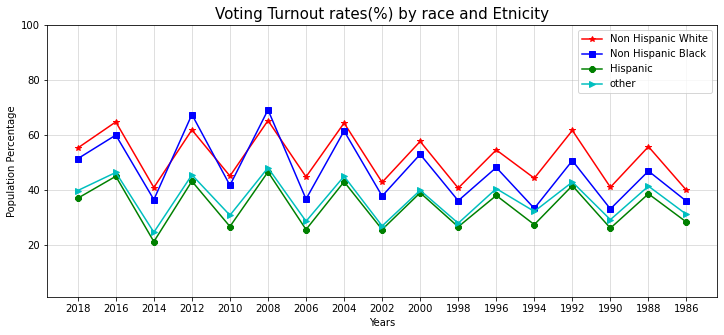

In [22]:
#plot to visualize voter turn out by race and ethnicity over the years
fig, ax = plt.subplots(1,1, figsize=(12,5))
ax.plot(demographic.columns[1:],demographic.iloc[0,1:].values,marker="*",color='r',label='Non Hispanic White')
ax.plot(demographic.columns[1:],demographic.iloc[1,1:].values,marker="s",color='b',label='Non Hispanic Black')
ax.plot(demographic.columns[1:],demographic.iloc[2,1:].values,marker="8",color='g',label='Hispanic')
ax.plot(demographic.columns[1:],demographic.iloc[3,1:].values,marker=">",color='c',label='other')
ax.set_title("Voting Turnout rates(%) by race and Etnicity", fontsize=15)
ax.grid(True ,alpha=0.5)
ax.set_xlabel('Years')
ax.set_ylabel('Population Percentage')
ax.legend(loc = 'best')
ax.set_ylim(1,100) 
plt.show()

Inspecting the above visualization, we can see that the voting turn out rates changed over the years by race and ethicity, considering this change we can use this as one of the predictor to check if this plays a role in the presidential election.

Data source for the above plot : [Electionproject](http://www.electproject.org/home/voter-turnout)

In [2]:
def cleanTxt (text):
    text = re.sub(r'\\[A-Za-z0-9]+', '', text)
    text = re.sub(r'http?:\/\/\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'/+', '', text)
    text = re.sub(r'!+', '', text)
    shortword = re.compile(r'\W*\b\w{1,3}\b')
    text = shortword.sub('', text)

    return text

def getSubjectivity (text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity (text):
    return TextBlob(text).sentiment.polarity

Functions to prepare forum data for sentiment analysis via textblob

In [3]:
def polCoder (text):
    if text == 'Very Conservative' or text == 'Conservative' or text == 'Slightly Conservative' or text == 'Very Conservative' or text == 'Libertarian - Right':
        text = 'Republican'

    elif text == 'Independen' or text == 'Cenrist' or text == 'Moderat' or text == 'Libertarian' or text == 'Other':
        text = 'Centrist'

    elif text == 'Libertarian - Left' or text == 'Slightly Liberal' or text == 'Liberal' or text == 'Very Liberal' or text == 'Progressive'  or text == 'Socialist' or text == 'Communist': 
        text = 'Democratic'
    
    else:
        text = 'None'
    
    return text

Function to code political leaning to Party Loyalty

In [4]:
states = pd.read_csv('states_and_state_code.csv')
states_names = states.State.tolist()
states_codes = states.State_code.tolist()

def locFormater(loc):
    loc = str(loc)
    loc = loc.upper()
    f = 0

    for i in range(len(states_names)):
        states_names_CAP = states_names[i].upper()
        if states_names_CAP in loc:
            loc = states_names[i]
            f = 4
            break
        else:
            f = 3 

    if f == 3:
        for i in range(len(states_names)):
            states_names_CAP = states_names[i].upper()
            if states_names_CAP in loc:
                loc = states_names[i]
                f = 1
            else:
                f = 2

    if f == 2 or ',' in loc:
        for i in range(len(states_codes)):
            if ',' in loc:
                loct = loc.partition(',')
                if states_codes[i] in loct[-1]:
                    loc = states_names[i]
                    f = 1
                    break
            else:
                f = 0

    if loc == 'Pensylvania'.upper():
        loc = 'Pensylvania'
        f = 1

    if loc == 'Massachusett'.upper():
        loc = 'Massachusetts'
        f = 1
    
    if f == 0:
        loc = None

    return loc

Function to format Location data and extract the State from where the Forum user is from

In [5]:
file_name = '2020_US_Presidential_Elections.csv'
df = pd.read_csv(file_name)

df['Content_up'] = df['Content'].apply(str)
df['Content_up'] = df['Content_up'].apply(cleanTxt)
df['Subjectivity'] = df['Content_up'].apply(getSubjectivity)
df['Polarity'] = df['Content_up'].apply(getPolarity)
df = df.drop('Content_up', axis=1)

Read dataset scraped from debatepolitics.com and conduct sentiment analysis (Change filename year to see data for 2016 and 2012).<br><br>
To see code used to scrape the data please check '2020-us-presidential-elections.ipynb', '2016-us-presidential-elections.ipynb' and '2012-us-presidential-elections.ipynb'

In [8]:
df['Party'] = df.Political_leaning.apply(polCoder)
thread_type =[]

for i in range(1, df.Thread.max() + 1):
    df_t = df[df.Thread == i].copy(deep=True)
    pol_val_demo = df_t[df_t.Party == 'Democratic'].Polarity.mean()
    pol_val_repu = df_t[df_t.Party == 'Rebublican'].Polarity.mean()
    if (pol_val_demo > 0 and pol_val_repu > 0) or (pol_val_demo < 0 and pol_val_repu < 0):
        for i in range(len(df_t)):
            thread_type.append('Bipartisan')
    elif pol_val_demo > 0 or pol_val_repu < 0:
        for i in range(len(df_t)):
            thread_type.append('Democratic')
    else:
        for i in range(len(df_t)):
            thread_type.append('Republican')

df['Thread_Type'] = thread_type

df = df.dropna()
df['State'] = df.Location.apply(locFormater)

display(df)

,Poster,Content,Thread,Gender,Location,Political_leaning,Subjectivity,Polarity,Party,Thread_Type,State
2,The Mark,Because people with less education generally h...,1,Male,Pensylvania,Progressive,0.367007,-0.013946,Democratic,Democratic,Pensylvania
5,ReubenSherr,boxedin saidBiden consistenly polls beter with...,1,Male,"San Luis Obispo, CA",Slightly Conservative,0.266667,0.145833,Republican,Democratic,California
8,Bullseye,boxedin saidBiden consistenly polls beter with...,1,Male,San Diego,Other,0.433333,-0.483333,Centrist,Democratic,None
10,ReubenSherr,RAMOSS saidEducation and IQ quite often have v...,1,Male,"San Luis Obispo, CA",Slightly Conservative,0.350000,0.143750,Republican,Democratic,California
12,Bullseye,Answer deus: Because of the complete failure o...,1,Male,San Diego,Other,0.350000,-0.108333,Centrist,Democratic,None
...,...,...,...,...,...,...,...,...,...,...,...
9640,ReubenSherr,BrotherFease saidI decided to take a break fro...,778,Male,"San Luis Obispo, CA",Slightly Conservative,0.335606,0.084848,Republican,Democratic,California
9641,BrotherFease,TomFitz saidIt will be a sizable victory if th...,778,Male,Western New York,Moderat,0.443143,0.379143,Centrist,Democratic,New York
9644,BrotherFease,Slavister saidWhat do you base that on? It's w...,778,Male,Western New York,Moderat,0.650000,0.100000,Centrist,Democratic,New York
9645,BrotherFease,Jay59 saidGood. You understand. Being so anony...,778,Male,Western New York,Moderat,0.468750,0.062500,Centrist,Democratic,New York


Identify type of conversation going on in each thread

Text(0.5, 1.0, 'Political conversations in Texas')

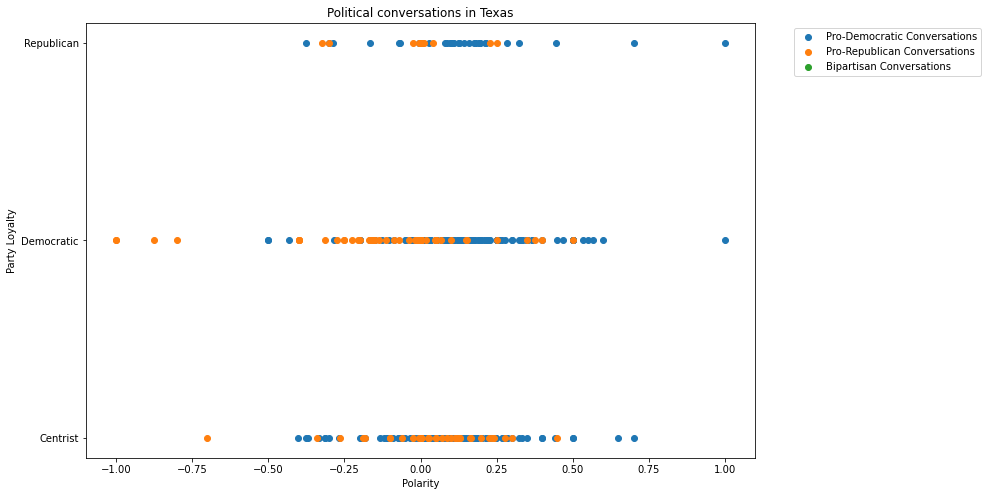

In [18]:
state_selected = 'Texas'
df_NY = df[df.State == state_selected].copy(deep=True)

plt.figure(figsize=(12,8))
plt.scatter(df_NY[df_NY.Thread_Type == 'Democratic'].Polarity, df_NY[df_NY.Thread_Type == 'Democratic'].Party, label = 'Pro-Democratic Conversations')
plt.scatter(df_NY[df_NY.Thread_Type == 'Republican'].Polarity, df_NY[df_NY.Thread_Type == 'Republican'].Party, label = 'Pro-Republican Conversations')
plt.scatter(df_NY[df_NY.Thread_Type == 'Bipartisan'].Polarity, df_NY[df_NY.Thread_Type == 'Bipartisan'].Party, label = 'Bipartisan Conversations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Polarity')
plt.ylabel('Party Loyalty')
plt.title(f'Political conversations in {state_selected}')

Text(0.5, 1.0, 'Political conversations in New York')

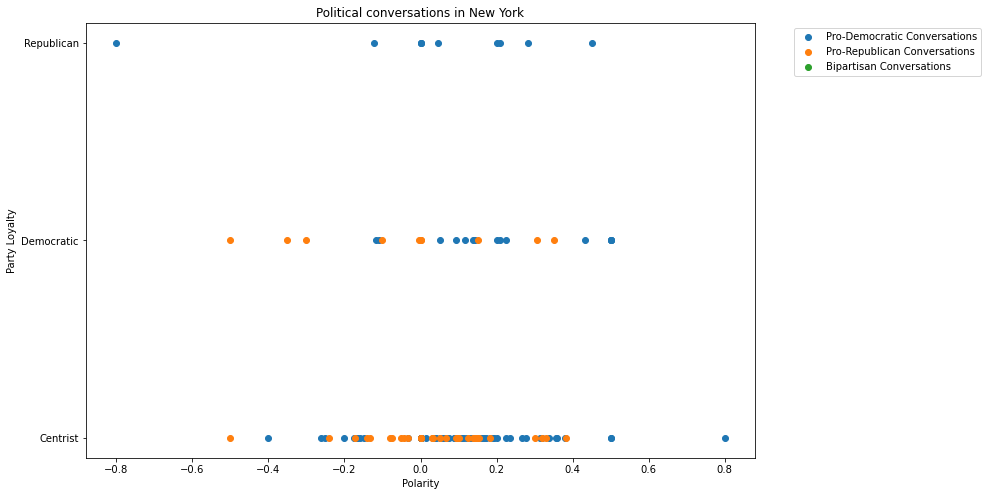

In [17]:
state_selected = 'New York'
df_NY = df[df.State == state_selected].copy(deep=True)

plt.figure(figsize=(12,8))
plt.scatter(df_NY[df_NY.Thread_Type == 'Democratic'].Polarity, df_NY[df_NY.Thread_Type == 'Democratic'].Party, label = 'Pro-Democratic Conversations')
plt.scatter(df_NY[df_NY.Thread_Type == 'Republican'].Polarity, df_NY[df_NY.Thread_Type == 'Republican'].Party, label = 'Pro-Republican Conversations')
plt.scatter(df_NY[df_NY.Thread_Type == 'Bipartisan'].Polarity, df_NY[df_NY.Thread_Type == 'Bipartisan'].Party, label = 'Bipartisan Conversations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Polarity')
plt.ylabel('Party Loyalty')
plt.title(f'Political conversations in {state_selected}')

Text(0.5, 1.0, 'Political conversations in California')

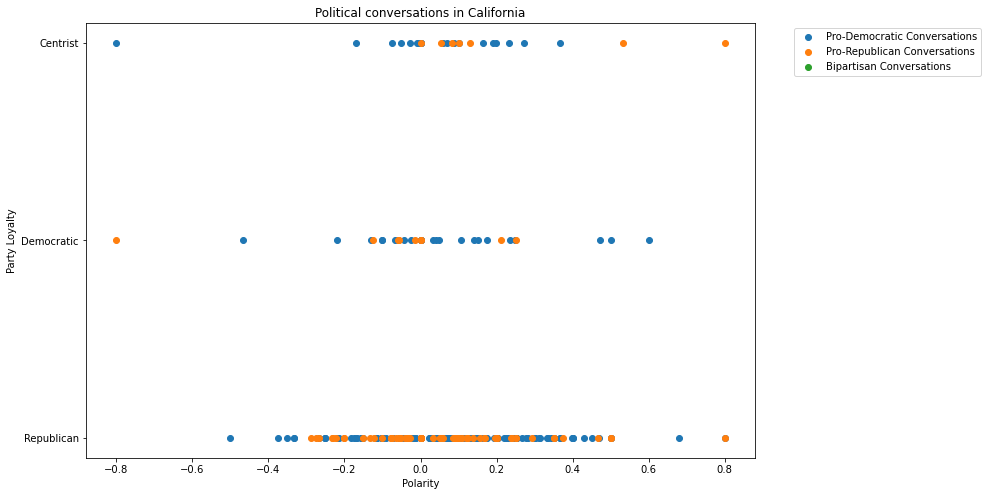

In [19]:
state_selected = 'California'
df_NY = df[df.State == state_selected].copy(deep=True)

plt.figure(figsize=(12,8))
plt.scatter(df_NY[df_NY.Thread_Type == 'Democratic'].Polarity, df_NY[df_NY.Thread_Type == 'Democratic'].Party, label = 'Pro-Democratic Conversations')
plt.scatter(df_NY[df_NY.Thread_Type == 'Republican'].Polarity, df_NY[df_NY.Thread_Type == 'Republican'].Party, label = 'Pro-Republican Conversations')
plt.scatter(df_NY[df_NY.Thread_Type == 'Bipartisan'].Polarity, df_NY[df_NY.Thread_Type == 'Bipartisan'].Party, label = 'Bipartisan Conversations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Polarity')
plt.ylabel('Party Loyalty')
plt.title(f'Political conversations in {state_selected}')

Plots to see polarity for political conversations taking place in 3 diffrent states